# S5 classification and regression test on symbol sequences

The input sequence is a 9-char sequence of A, B, C, e.g. BCACBAACB.

The classification target (output) is whether there are at least 5 A's, e.g.

BCACBAACB -> 0

ACACAAACB -> 1

The regression target is the number of A's divided by 9, e.g.

BCACBAACB -> .3333...

ACACAAACB -> .5555...

AAAAAAAAA -> 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

import jax
print('Using', jax.devices()[0].platform)

from disp import get_line, set_color, set_plot
# from my_torch import fit_song_fmtn
from run_train import TrainArgs, train

cc = np.concatenate

if not os.path.exists('epochs_clf'):
    os.makedirs('epochs_clf')
if not os.path.exists('epochs_rgr'):
    os.makedirs('epochs_rgr')

Using gpu


## Classification test

In [2]:
DATA_DIR = 'ultralight/clf'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='clf_token', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_clf...
[*] Setting Randomness...
[*] Generating Token Sequence Classification Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Vcab size: 6
[*] Starting S5 clf_token training on `ultralight/clf` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1802


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:08<00:00,  2.81it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.10it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 420.14it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 5.45023 -- Val Loss: 0.52933 --Test Loss: 0.52933 -- Val Accuracy: 0.9650 -- Test Accuracy: 0.9650
	Best Val Loss: 0.52933 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 51.12it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 439.62it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 436.97it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.46898 -- Val Loss: 0.54908 --Test Loss: 0.54908 -- Val Accuracy: 0.7450 -- Test Accuracy: 0.7450
	Best Val Loss: 0.52933 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 51.62it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 436.74it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 422.65it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.14205 -- Val Loss: 0.52705 --Test Loss: 0.52705 -- Val Accuracy: 0.8800 -- Test Accuracy: 0.8800
	Best Val Loss: 0.52705 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 51.62it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 441.94it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 429.66it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.12394 -- Val Loss: 0.43820 --Test Loss: 0.43820 -- Val Accuracy: 0.8800 -- Test Accuracy: 0.8800
	Best Val Loss: 0.43820 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 51.55it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 427.19it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 438.96it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.10493 -- Val Loss: 0.22205 --Test Loss: 0.22205 -- Val Accuracy: 0.8850 -- Test Accuracy: 0.8850
	Best Val Loss: 0.22205 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 51.36it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 398.16it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 429.57it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.09892 -- Val Loss: 0.11049 --Test Loss: 0.11049 -- Val Accuracy: 0.9650 -- Test Accuracy: 0.9650
	Best Val Loss: 0.11049 -- Best Val Accuracy: 0.9650 at Epoch 1
	Best Test Loss: 0.52933 -- Best Test Accuracy: 0.9650 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 51.37it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 424.34it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 398.08it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.08507 -- Val Loss: 0.06784 --Test Loss: 0.06784 -- Val Accuracy: 0.9900 -- Test Accuracy: 0.9900
	Best Val Loss: 0.06784 -- Best Val Accuracy: 0.9900 at Epoch 7
	Best Test Loss: 0.06784 -- Best Test Accuracy: 0.9900 at Epoch 7

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 51.50it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 436.39it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 435.55it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.08456 -- Val Loss: 0.05665 --Test Loss: 0.05665 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.05665 -- Best Val Accuracy: 1.0000 at Epoch 8
	Best Test Loss: 0.05665 -- Best Test Accuracy: 1.0000 at Epoch 8

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 51.56it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 432.71it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 424.37it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.09441 -- Val Loss: 0.05012 --Test Loss: 0.05012 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.05012 -- Best Val Accuracy: 1.0000 at Epoch 8
	Best Test Loss: 0.05665 -- Best Test Accuracy: 1.0000 at Epoch 8

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 51.57it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 432.12it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 422.65it/s]


=>> Epoch 10 Metrics ===
	Train Loss: 0.07219 -- Val Loss: 0.04580 --Test Loss: 0.04580 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.04580 -- Best Val Accuracy: 1.0000 at Epoch 8
	Best Test Loss: 0.05665 -- Best Test Accuracy: 1.0000 at Epoch 8



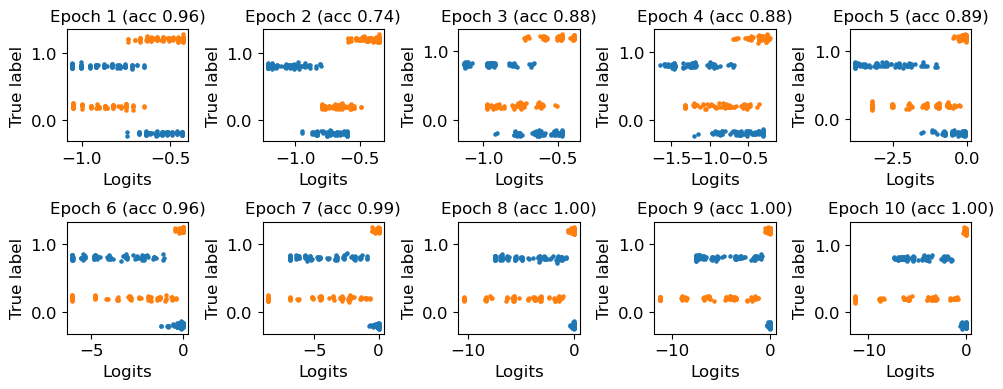

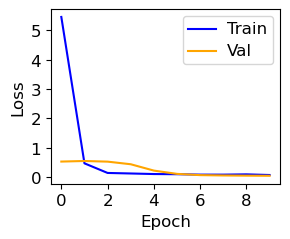

In [3]:
from disp import colors

# load results
fig, axs = plt.subplots(2, 5, figsize=(10, 4), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    acc = np.mean(targs == preds.argmax(1))
    
    labels = np.sort(np.unique(targs))
    y_ticks = []
    
    for clabel_0, label_0 in enumerate(labels):
        for clabel_1, label_1 in enumerate(labels):
            logits = preds[targs==label_0, clabel_1]
            display_jitter = .02*np.random.randn(len(logits))
            ax.scatter(logits, np.zeros(len(logits)) + clabel_0 + .8*clabel_1/len(labels) + display_jitter, c=colors[clabel_1], s=5)
            
        y_ticks.append(clabel_0 + .2)
    
    set_plot(ax, y_ticks=y_ticks, y_tick_labels=labels, x_label='Logits', y_label='True label', title=f'Epoch {cepoch+1} (acc {acc:.2f})')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

# Regression test

In [4]:
DATA_DIR = 'ultralight/rgr'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='rgr_token', dt_global=True, epochs=20, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_rgr...
[*] Setting Randomness...
[*] Generating Token Sequence Regression Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Vocab size: 6
[*] Starting S5 rgr_token training on `ultralight/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:08<00:00,  3.02it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:06<00:00,  1.05it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 378.43it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 3.99491 -- Val Loss: 0.66527 --Test Loss: 0.66527 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 49.39it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 400.96it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 305.40it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.66853 -- Val Loss: 0.79810 --Test Loss: 0.79810 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 51.28it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 406.62it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 311.79it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.43268 -- Val Loss: 1.23398 --Test Loss: 1.23398 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 51.33it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 406.48it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 307.03it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.33547 -- Val Loss: 1.97340 --Test Loss: 1.97340 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 51.62it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 408.08it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 307.44it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.24872 -- Val Loss: 2.30225 --Test Loss: 2.30225 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 51.64it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 406.98it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 306.85it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.24540 -- Val Loss: 1.38666 --Test Loss: 1.38666 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 51.73it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 408.57it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 306.04it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.16243 -- Val Loss: 0.84982 --Test Loss: 0.84982 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.66527 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 51.68it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 402.24it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 304.54it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.20440 -- Val Loss: 0.20862 --Test Loss: 0.20862 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.20862 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 51.14it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 403.32it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 309.63it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.20871 -- Val Loss: 0.12382 --Test Loss: 0.12382 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.12382 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 51.75it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 408.97it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 304.11it/s]



=>> Epoch 10 Metrics ===
	Train Loss: 0.14713 -- Val Loss: 0.03340 --Test Loss: 0.03340 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 11...
using constant lr for epoch 11


100%|██████████| 25/25 [00:00<00:00, 51.59it/s]


[*] Running Epoch 11 Validation...


100%|██████████| 7/7 [00:00<00:00, 407.68it/s]


[*] Running Epoch 11 Test...


100%|██████████| 7/7 [00:00<00:00, 306.74it/s]



=>> Epoch 11 Metrics ===
	Train Loss: 0.17771 -- Val Loss: 0.08676 --Test Loss: 0.08676 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 12...
using constant lr for epoch 12


100%|██████████| 25/25 [00:00<00:00, 51.74it/s]


[*] Running Epoch 12 Validation...


100%|██████████| 7/7 [00:00<00:00, 409.17it/s]


[*] Running Epoch 12 Test...


100%|██████████| 7/7 [00:00<00:00, 303.57it/s]



=>> Epoch 12 Metrics ===
	Train Loss: 0.09736 -- Val Loss: 0.05999 --Test Loss: 0.05999 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 13...
using constant lr for epoch 13


100%|██████████| 25/25 [00:00<00:00, 51.73it/s]


[*] Running Epoch 13 Validation...


100%|██████████| 7/7 [00:00<00:00, 404.84it/s]


[*] Running Epoch 13 Test...


100%|██████████| 7/7 [00:00<00:00, 304.89it/s]



=>> Epoch 13 Metrics ===
	Train Loss: 0.09663 -- Val Loss: 0.04169 --Test Loss: 0.04169 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 14...
using constant lr for epoch 14


100%|██████████| 25/25 [00:00<00:00, 51.71it/s]


[*] Running Epoch 14 Validation...


100%|██████████| 7/7 [00:00<00:00, 409.78it/s]


[*] Running Epoch 14 Test...


100%|██████████| 7/7 [00:00<00:00, 306.98it/s]



=>> Epoch 14 Metrics ===
	Train Loss: 0.12613 -- Val Loss: 0.14622 --Test Loss: 0.14622 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 15...
using constant lr for epoch 15


100%|██████████| 25/25 [00:00<00:00, 51.47it/s]


[*] Running Epoch 15 Validation...


100%|██████████| 7/7 [00:00<00:00, 403.46it/s]


[*] Running Epoch 15 Test...


100%|██████████| 7/7 [00:00<00:00, 305.59it/s]



=>> Epoch 15 Metrics ===
	Train Loss: 0.13020 -- Val Loss: 0.04896 --Test Loss: 0.04896 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 16...
using constant lr for epoch 16


100%|██████████| 25/25 [00:00<00:00, 51.46it/s]


[*] Running Epoch 16 Validation...


100%|██████████| 7/7 [00:00<00:00, 404.27it/s]


[*] Running Epoch 16 Test...


100%|██████████| 7/7 [00:00<00:00, 308.93it/s]



=>> Epoch 16 Metrics ===
	Train Loss: 0.19211 -- Val Loss: 0.23943 --Test Loss: 0.23943 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 17...
using constant lr for epoch 17


100%|██████████| 25/25 [00:00<00:00, 51.41it/s]


[*] Running Epoch 17 Validation...


100%|██████████| 7/7 [00:00<00:00, 406.39it/s]


[*] Running Epoch 17 Test...


100%|██████████| 7/7 [00:00<00:00, 311.45it/s]



=>> Epoch 17 Metrics ===
	Train Loss: 0.09465 -- Val Loss: 0.06609 --Test Loss: 0.06609 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 18...
using constant lr for epoch 18


100%|██████████| 25/25 [00:00<00:00, 51.59it/s]


[*] Running Epoch 18 Validation...


100%|██████████| 7/7 [00:00<00:00, 409.10it/s]


[*] Running Epoch 18 Test...


100%|██████████| 7/7 [00:00<00:00, 304.82it/s]



=>> Epoch 18 Metrics ===
	Train Loss: 0.07157 -- Val Loss: 0.05646 --Test Loss: 0.05646 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 19...
using constant lr for epoch 19


100%|██████████| 25/25 [00:00<00:00, 51.70it/s]


[*] Running Epoch 19 Validation...


100%|██████████| 7/7 [00:00<00:00, 407.99it/s]


[*] Running Epoch 19 Test...


100%|██████████| 7/7 [00:00<00:00, 303.13it/s]



=>> Epoch 19 Metrics ===
	Train Loss: 0.06035 -- Val Loss: 0.12916 --Test Loss: 0.12916 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 20...
using constant lr for epoch 20


100%|██████████| 25/25 [00:00<00:00, 51.67it/s]


[*] Running Epoch 20 Validation...


100%|██████████| 7/7 [00:00<00:00, 410.30it/s]


[*] Running Epoch 20 Test...


100%|██████████| 7/7 [00:00<00:00, 302.24it/s]



=>> Epoch 20 Metrics ===
	Train Loss: 0.08319 -- Val Loss: 0.06781 --Test Loss: 0.06781 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.03340 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



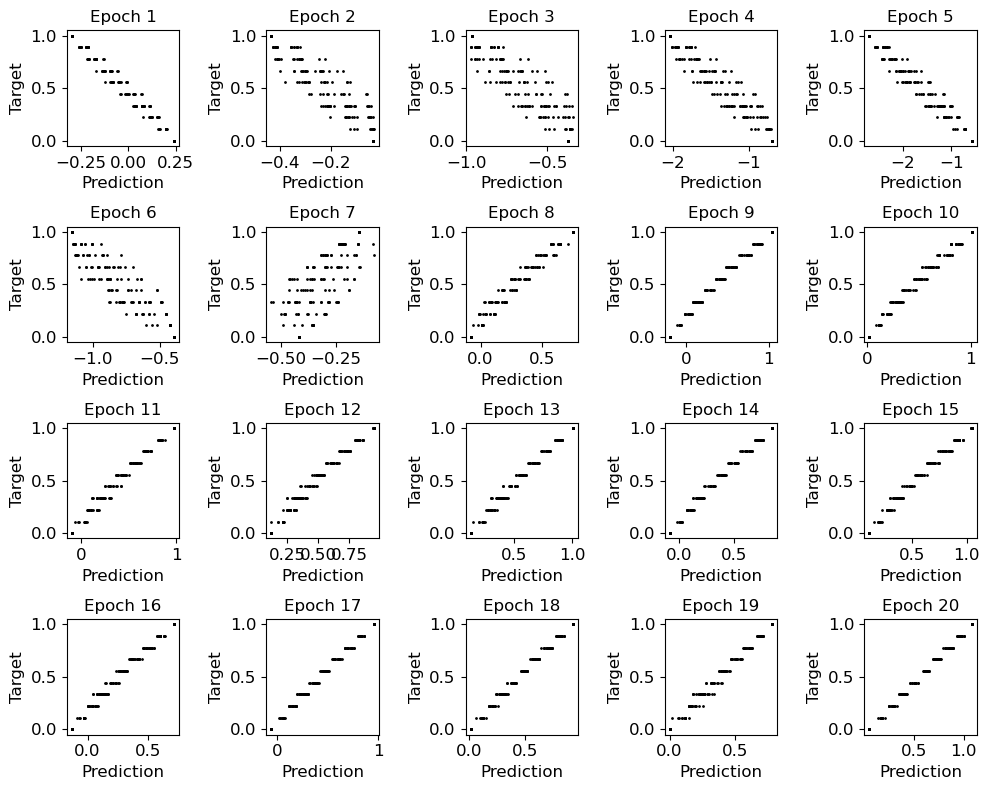

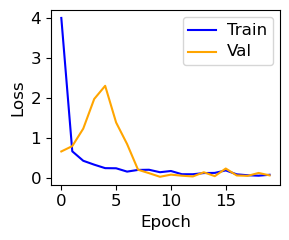

In [5]:
# load results
fig, axs = plt.subplots(4, 5, figsize=(10, 8), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')